In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
metrics_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_17"


training_metrics = pd.read_csv(f"{metrics_path}/metrics.csv")


training_metrics

,brier_score,epoch,lr_find/suggested_lr,multilabel_f1_macro,multilabel_f1_micro,multilabel_f1_weighted,step,train_brier_Atelectasis_epoch,train_brier_Atelectasis_step,train_brier_Cardiomegaly_epoch,...,val_brier_Mass,val_brier_No Finding,val_brier_Nodule,val_brier_Pleural_Thickening,val_brier_Pneumonia,val_brier_Pneumothorax,val_loss,val_multilabel_f1_macro,val_multilabel_f1_micro,val_multilabel_f1_weighted
0,NaN,NaN,0.000001,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,NaN,49,NaN,0.494379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,99,NaN,0.445217,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,NaN,NaN,NaN,NaN,149,NaN,0.412757,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,NaN,NaN,NaN,NaN,199,NaN,0.389361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,NaN,49.0,NaN,NaN,NaN,NaN,26949,NaN,0.210919,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,49.0,NaN,NaN,NaN,NaN,26999,NaN,0.210901,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,49.0,NaN,NaN,NaN,NaN,27049,NaN,0.210882,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,0.191351,49.0,NaN,NaN,NaN,NaN,27049,NaN,NaN,NaN,...,0.20827,0.215224,0.229925,0.204188,0.211741,0.186588,1.101231,0.185319,0.268271,0.46551


<Axes: xlabel='epoch', ylabel='val_loss'>

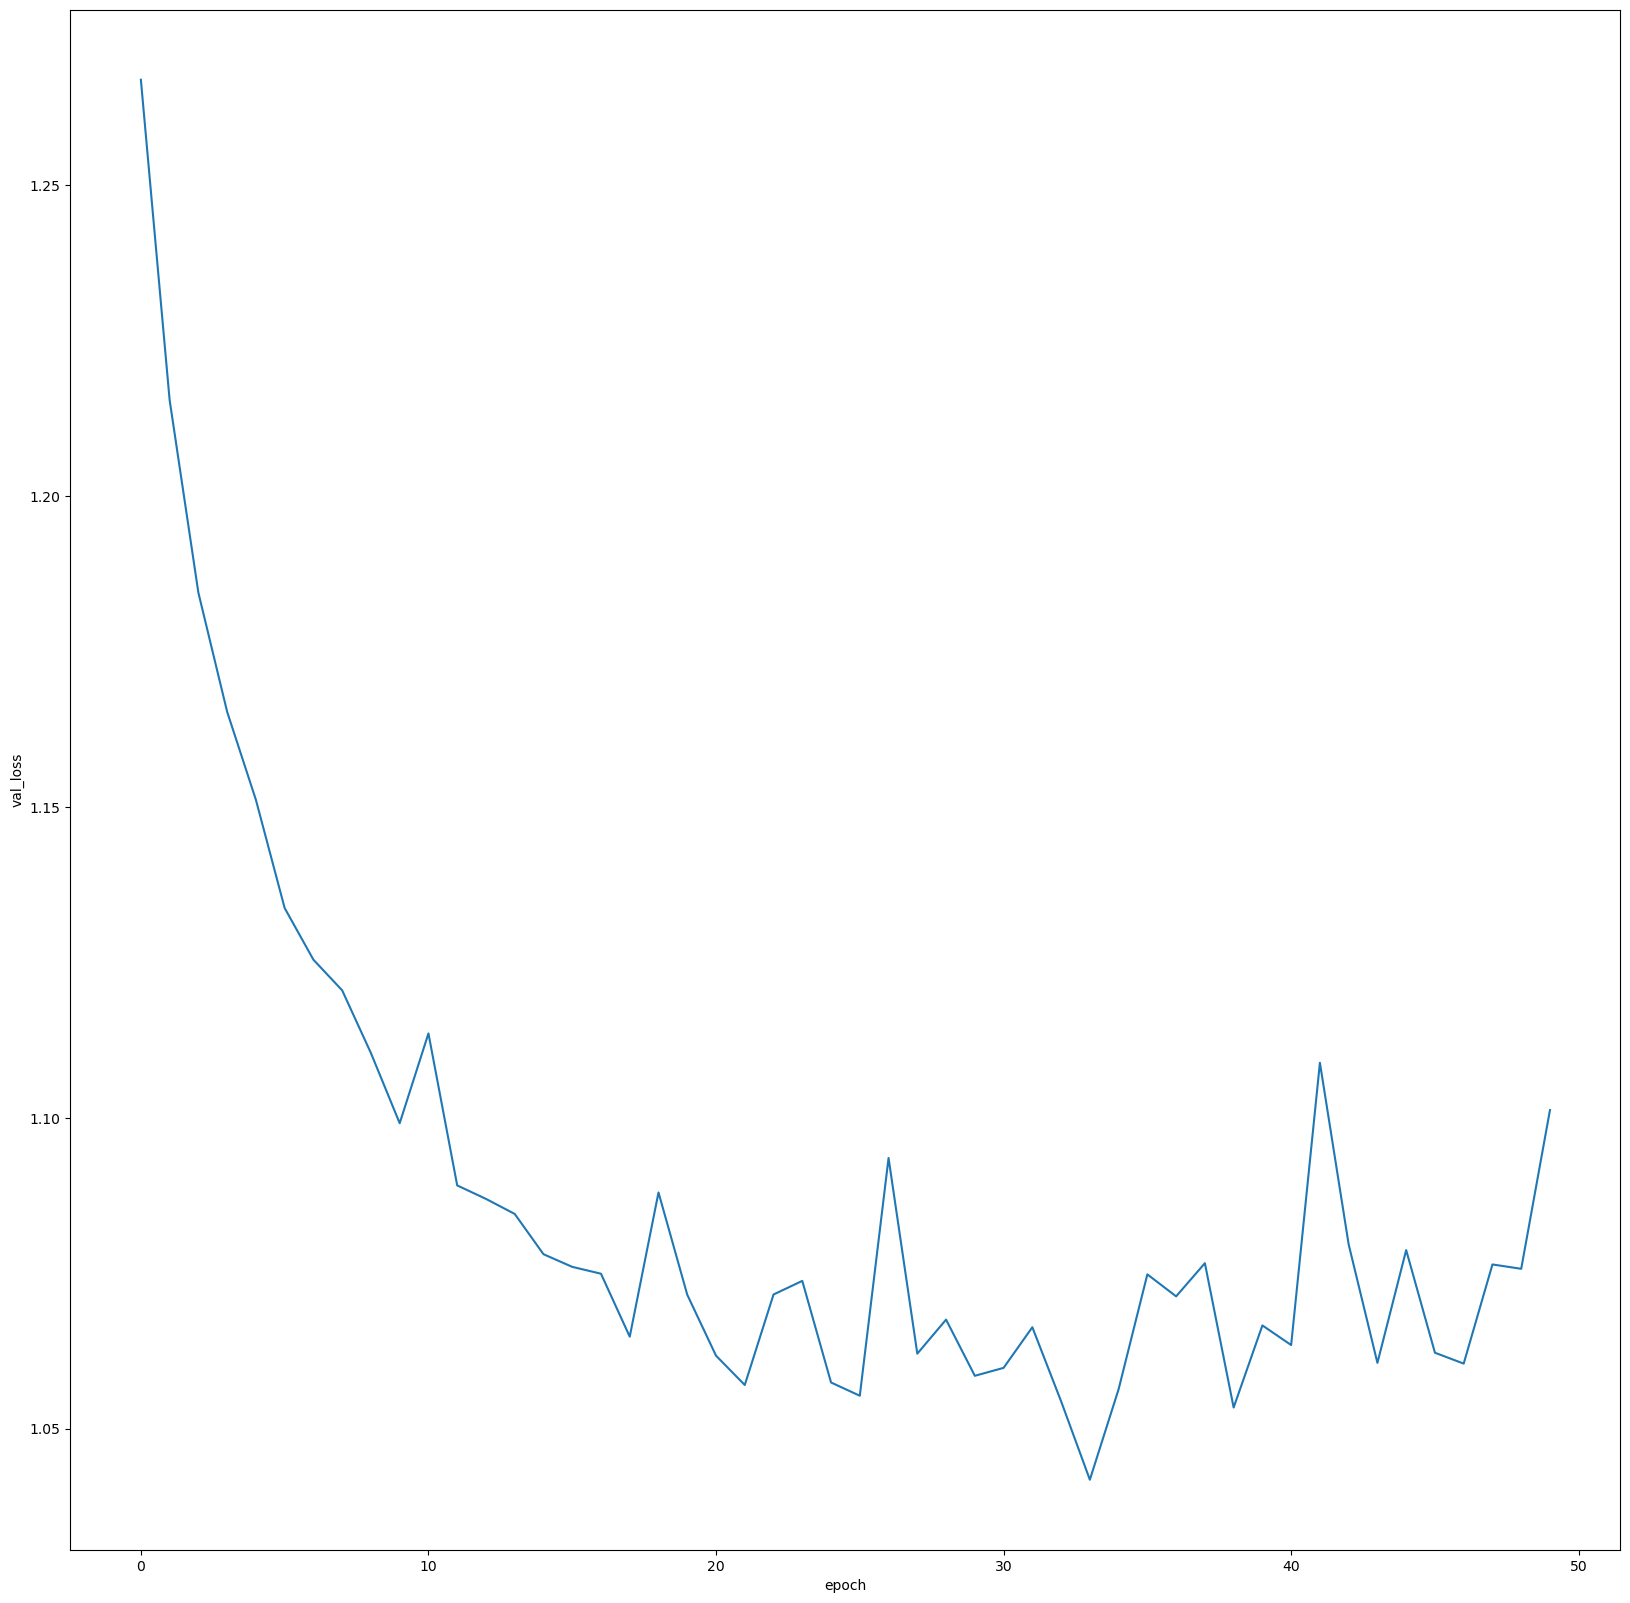

In [6]:
plt.figure(figsize = (20, 20))
sns.lineplot(data = training_metrics, y = "val_loss", x = "epoch")

<Axes: >

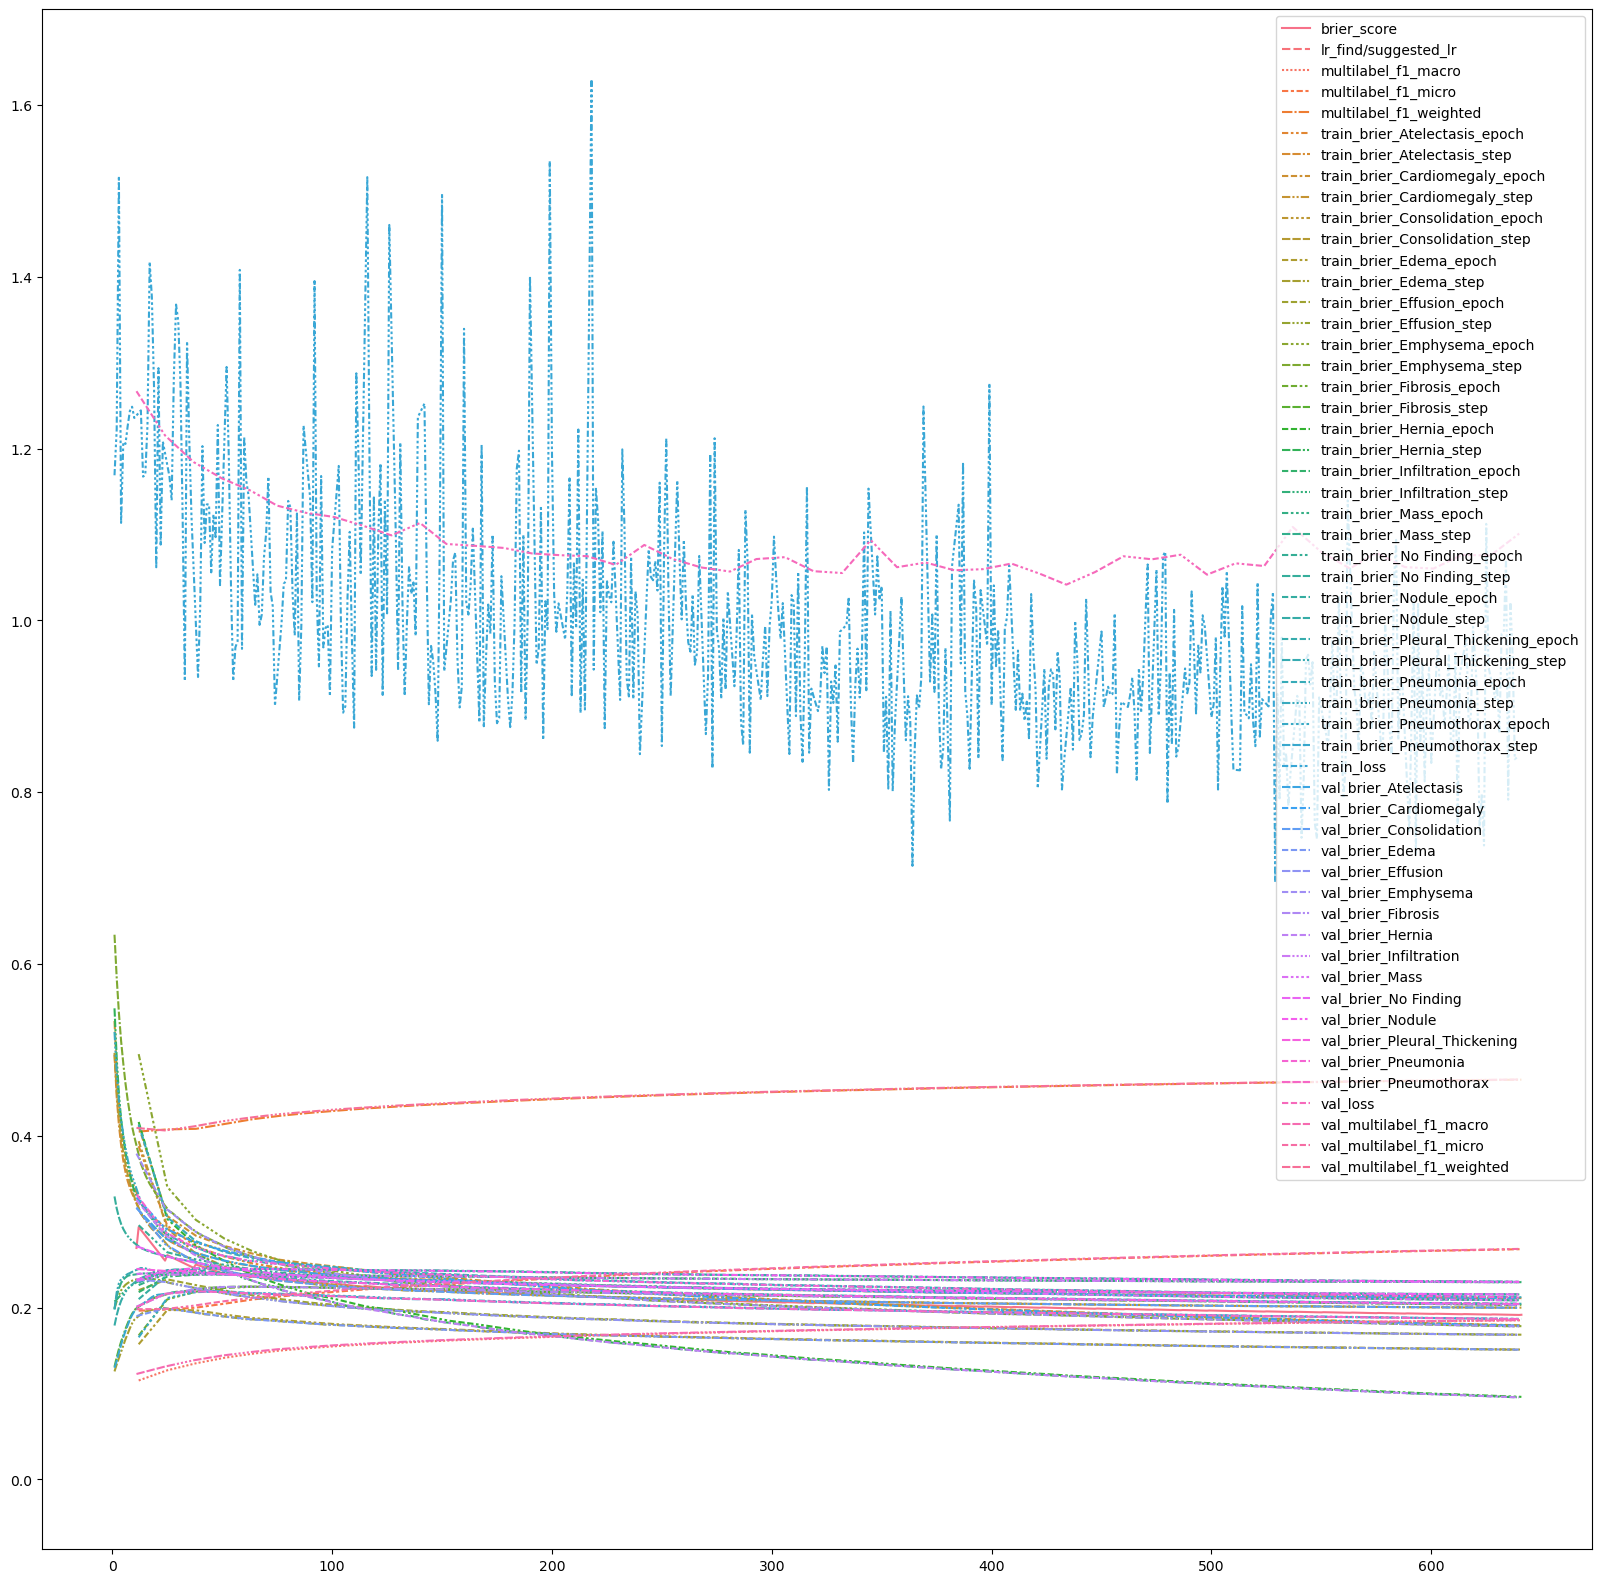

In [5]:

plt.figure(figsize = (20, 20))
sns.lineplot(data = training_metrics.drop(columns = ['step', 'epoch']))

In [7]:
pd.read_csv("/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_17/checkpoint_evaluation/test_multi_metrics_per_label_threshold.csv")

,Unnamed: 0,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,micro avg,macro avg,weighted avg,samples avg
0,precision,0.529280,0.237001,0.226644,0.328380,0.331180,0.134625,0.126230,0.049226,0.296635,0.121180,0.112958,0.125448,0.054865,0.112029,0.084337,0.249463,0.191334,0.314867,0.327656
1,recall,0.624176,0.528210,0.367633,0.711679,0.687827,0.469108,0.276648,0.189189,0.463039,0.683747,0.580541,0.480329,0.416092,0.272966,0.488372,0.573151,0.482637,0.573151,0.580623
2,f1-score,0.572825,0.327194,0.280414,0.449400,0.447091,0.209210,0.173359,0.078125,0.361612,0.205873,0.189118,0.198939,0.096947,0.158859,0.143836,0.347623,0.259520,0.391277,0.387404
3,support,9861.000000,3279.000000,1069.000000,4658.000000,6112.000000,1748.000000,1623.000000,555.000000,2665.000000,1815.000000,925.000000,1093.000000,435.000000,1143.000000,86.000000,37067.000000,37067.000000,37067.000000,37067.000000


In [39]:
predicted_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_15/all_pred_labels.csv"
preds = pd.read_csv(predicted_path, index_col = 0)

In [6]:
pr_path_no_weighting = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_15/pr_auc_per_label.csv"

not_weighted = pd.read_csv(pr_path_no_weighting)

In [7]:
pr_path_weighting = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_16/checkpoint_evaluation/pr_auc_per_label.csv"
weighted = pd.read_csv(pr_path_weighting)

In [17]:
merged = pd.merge(not_weighted, weighted, on = "label")

<Axes: xlabel='variable', ylabel='value'>

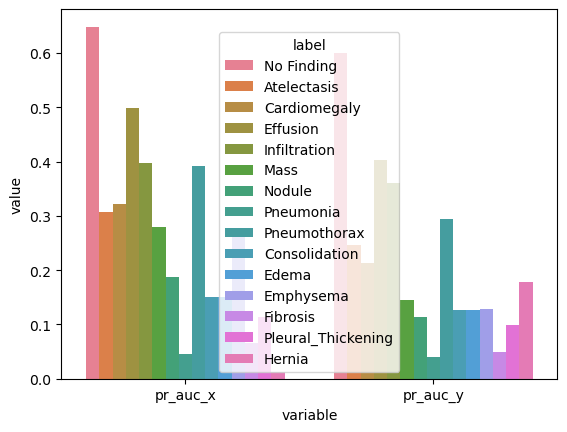

In [22]:
merged_long = pd.melt(merged, id_vars = "label", value_vars=['pr_auc_x', 'pr_auc_y'])

plt.figure(figsize = ())
sns.barplot(data = merged_long, x = "variable", y = "value", hue = "label")